In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df = pd.read_csv("ratings.csv")

In [ ]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df2 = pd.read_csv("movies.csv")

In [ ]:
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Data integrity and formatting

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
df["enjoyed"] = np.where(df["rating"] > 2.5, 1, 0)

In [ ]:
# split genre column
df2[['Genre1', 'Genre2', 'Genre3']] = df2['genres'].str.split('|', n=2, expand=True)
df2 = df2.drop(['genres', 'Genre3'], axis=1)
print(df2[['Genre1', 'Genre2']])

         Genre1     Genre2
0     Adventure  Animation
1     Adventure   Children
2        Comedy    Romance
3        Comedy      Drama
4        Comedy       None
...         ...        ...
9737     Action  Animation
9738  Animation     Comedy
9739      Drama       None
9740     Action  Animation
9741     Comedy       None

[9742 rows x 2 columns]


In [ ]:
df2.isnull().sum()

movieId       0
title         0
Genre1        0
Genre2     2851
dtype: int64

In [ ]:

#rename int columns in standard way

names_update = []

for col_names in df2.columns:

    if type(col_names) == int:
        name = f"genre_{col_names}"
        names_update.append(name)

    else:
        name = col_names
        names_update.append(name)

df2.columns = names_update
df2.head()

,movieId,title,Genre1,Genre2
0,1,Toy Story (1995),Adventure,Animation
1,2,Jumanji (1995),Adventure,Children
2,3,Grumpier Old Men (1995),Comedy,Romance
3,4,Waiting to Exhale (1995),Comedy,Drama
4,5,Father of the Bride Part II (1995),Comedy,None


In [ ]:
df = df.merge(df2, how = "inner", on = "movieId")

In [ ]:
df.head()

,userId,movieId,rating,timestamp,title,Genre1,Genre2
0,1,1,4.0,964982703,Toy Story (1995),Adventure,Animation
1,5,1,4.0,847434962,Toy Story (1995),Adventure,Animation
2,7,1,4.5,1106635946,Toy Story (1995),Adventure,Animation
3,15,1,2.5,1510577970,Toy Story (1995),Adventure,Animation
4,17,1,4.5,1305696483,Toy Story (1995),Adventure,Animation


In [ ]:
#Extracting the year from brackets

df["year"] = df["title"].str.extract(r"\((\d{4})\)")
df["title"] = df["title"].str.replace(r"\s*\(\d{4}\)", "")

df["year"] = pd.to_datetime(df["year"] + "-01-01")
df["year"] = df["year1"]
df = df.drop(["year1"], axis = 1)

df.head()

<ipython-input-431-aa4dc7070e07>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["title"] = df["title"].str.replace(r"\s*\(\d{4}\)", "")


,userId,movieId,rating,timestamp,enjoyed,title,Genre1,Genre2,year
0,1,1,4.0,964982703,1,Toy Story,Adventure,Animation,1995-01-01
1,5,1,4.0,847434962,1,Toy Story,Adventure,Animation,1995-01-01
2,7,1,4.5,1106635946,1,Toy Story,Adventure,Animation,1995-01-01
3,15,1,2.5,1510577970,0,Toy Story,Adventure,Animation,1995-01-01
4,17,1,4.5,1305696483,1,Toy Story,Adventure,Animation,1995-01-01


In [ ]:
df.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
enjoyed          0
title            0
Genre1           0
Genre2       16414
year            18
dtype: int64

Exploratory Data
Movies data set data integrity check and explanatory data analytics.

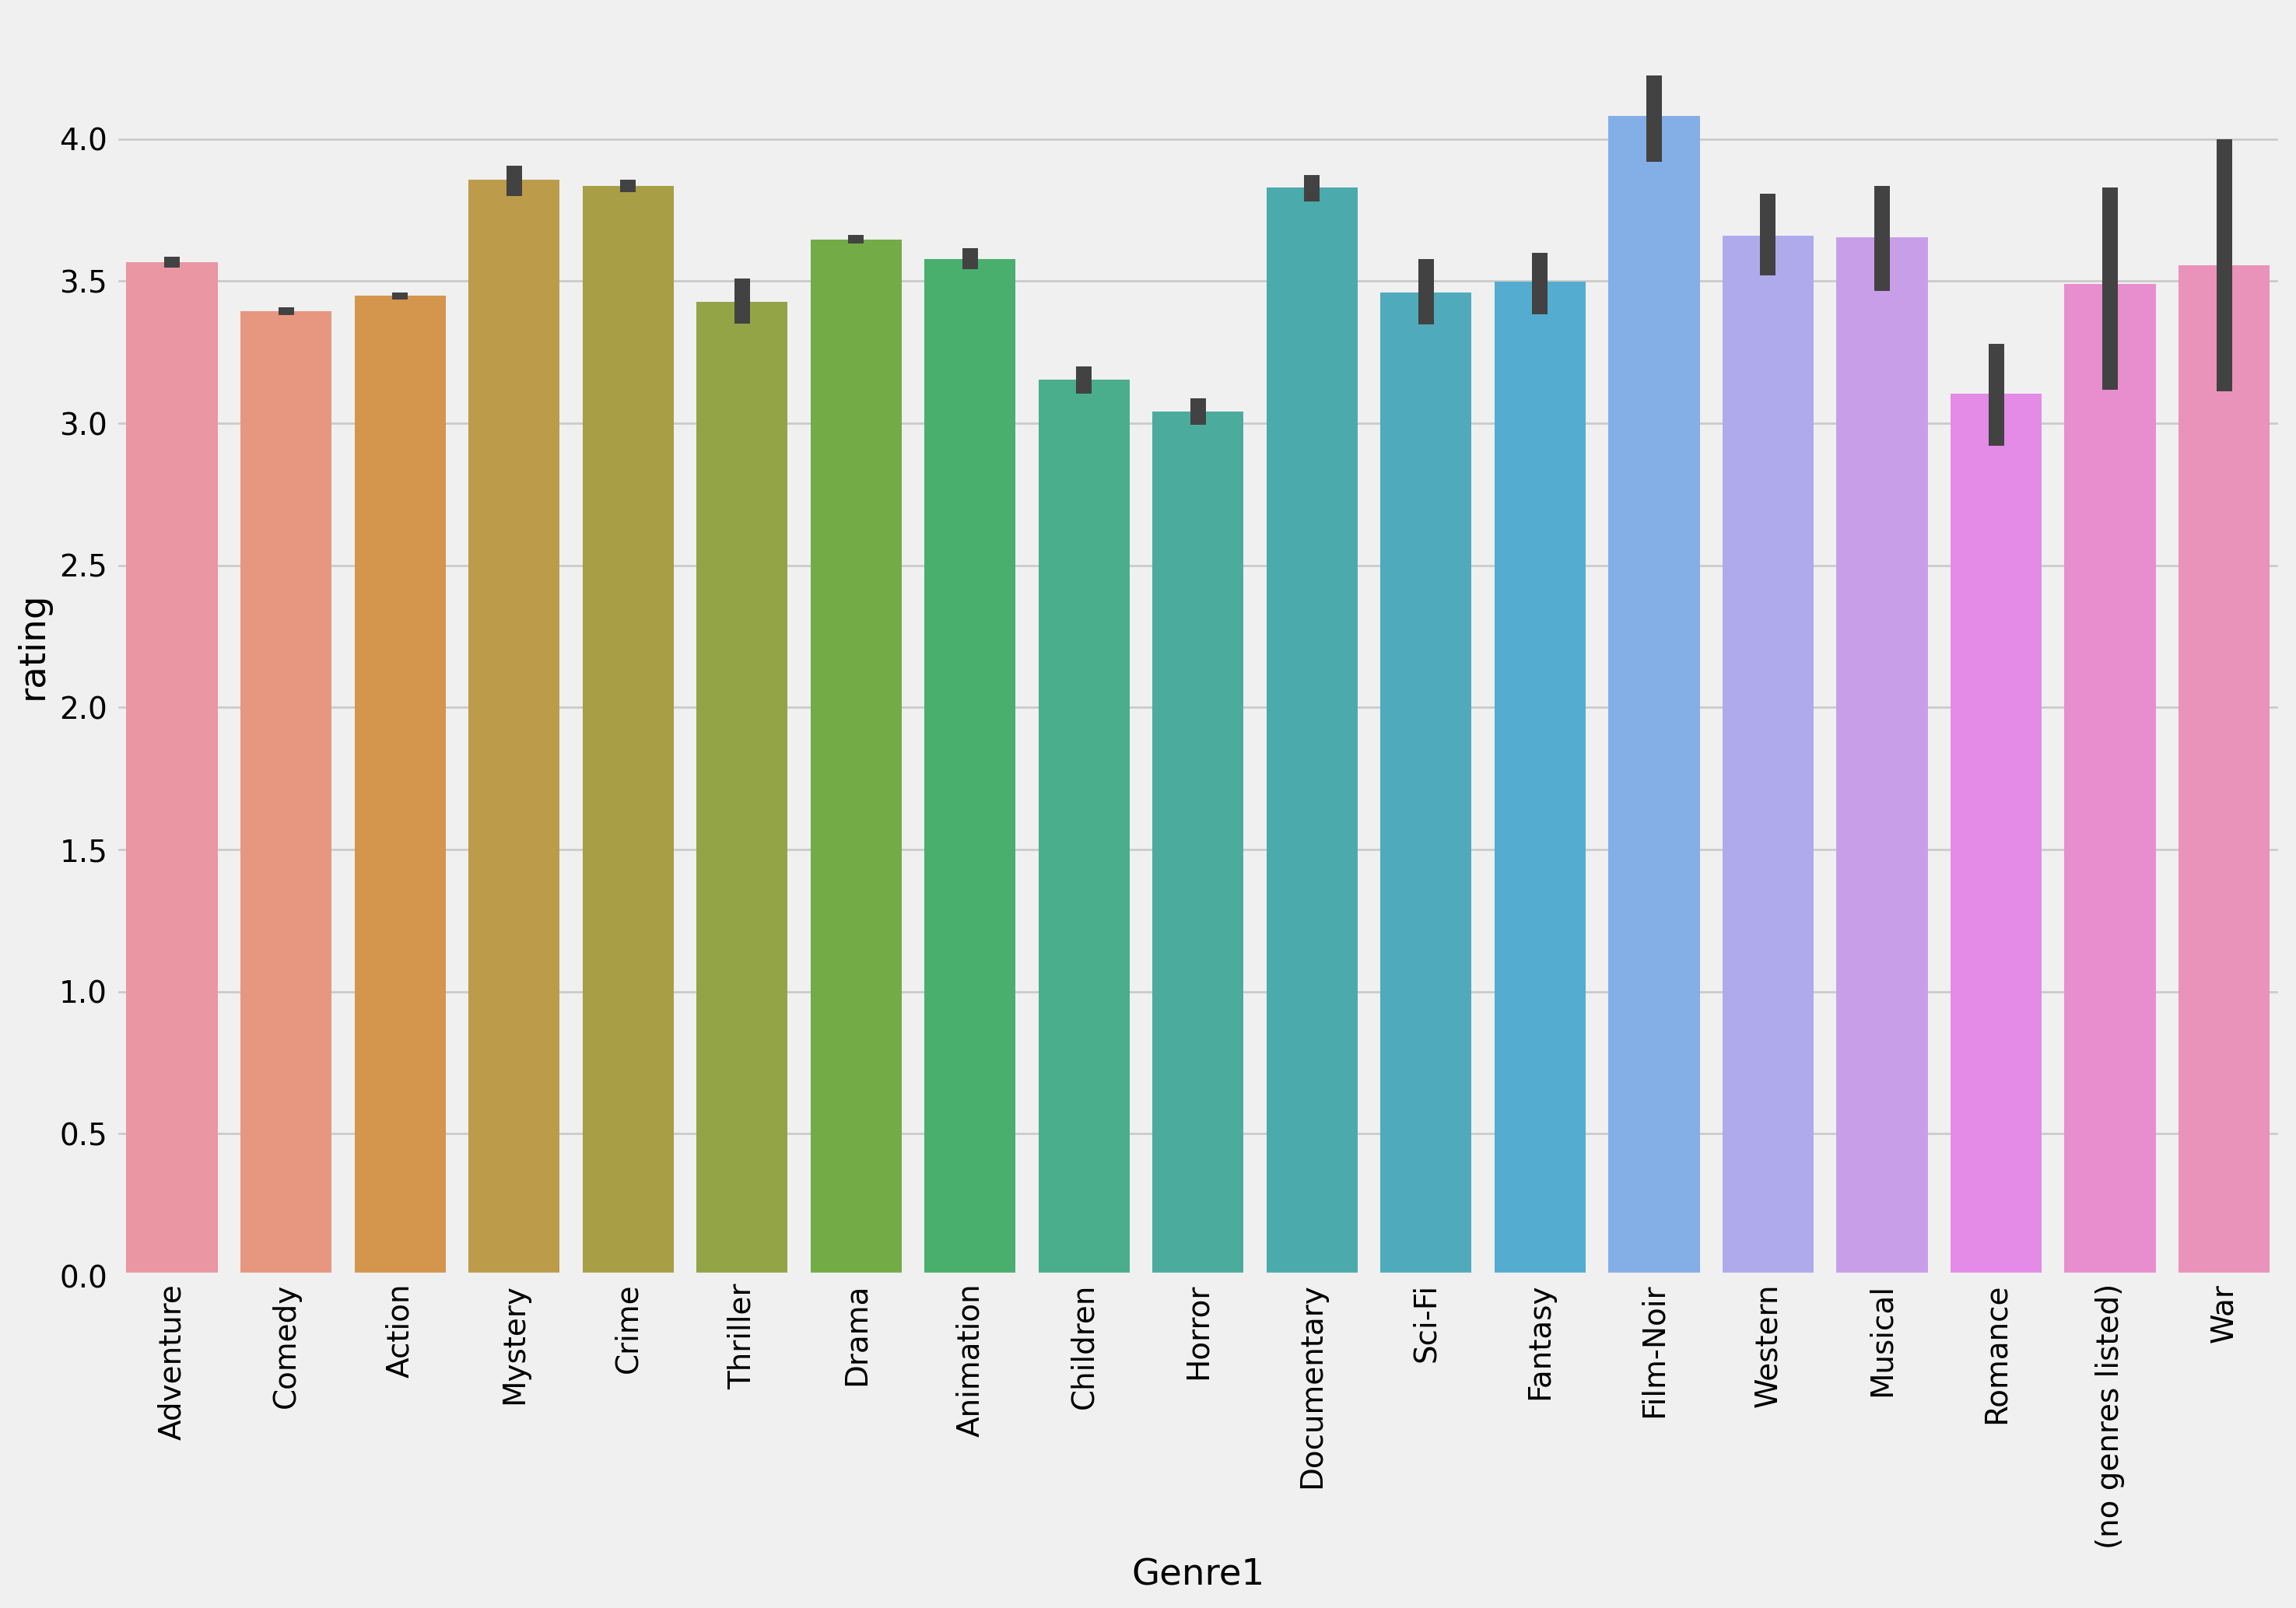

In [ ]:
#ratings by genres
fig = plt.figure(figsize = (16, 10), dpi = 200)
sns.barplot(data = df, x = "Genre1", y = "rating")
plt.xticks(rotation = 90);

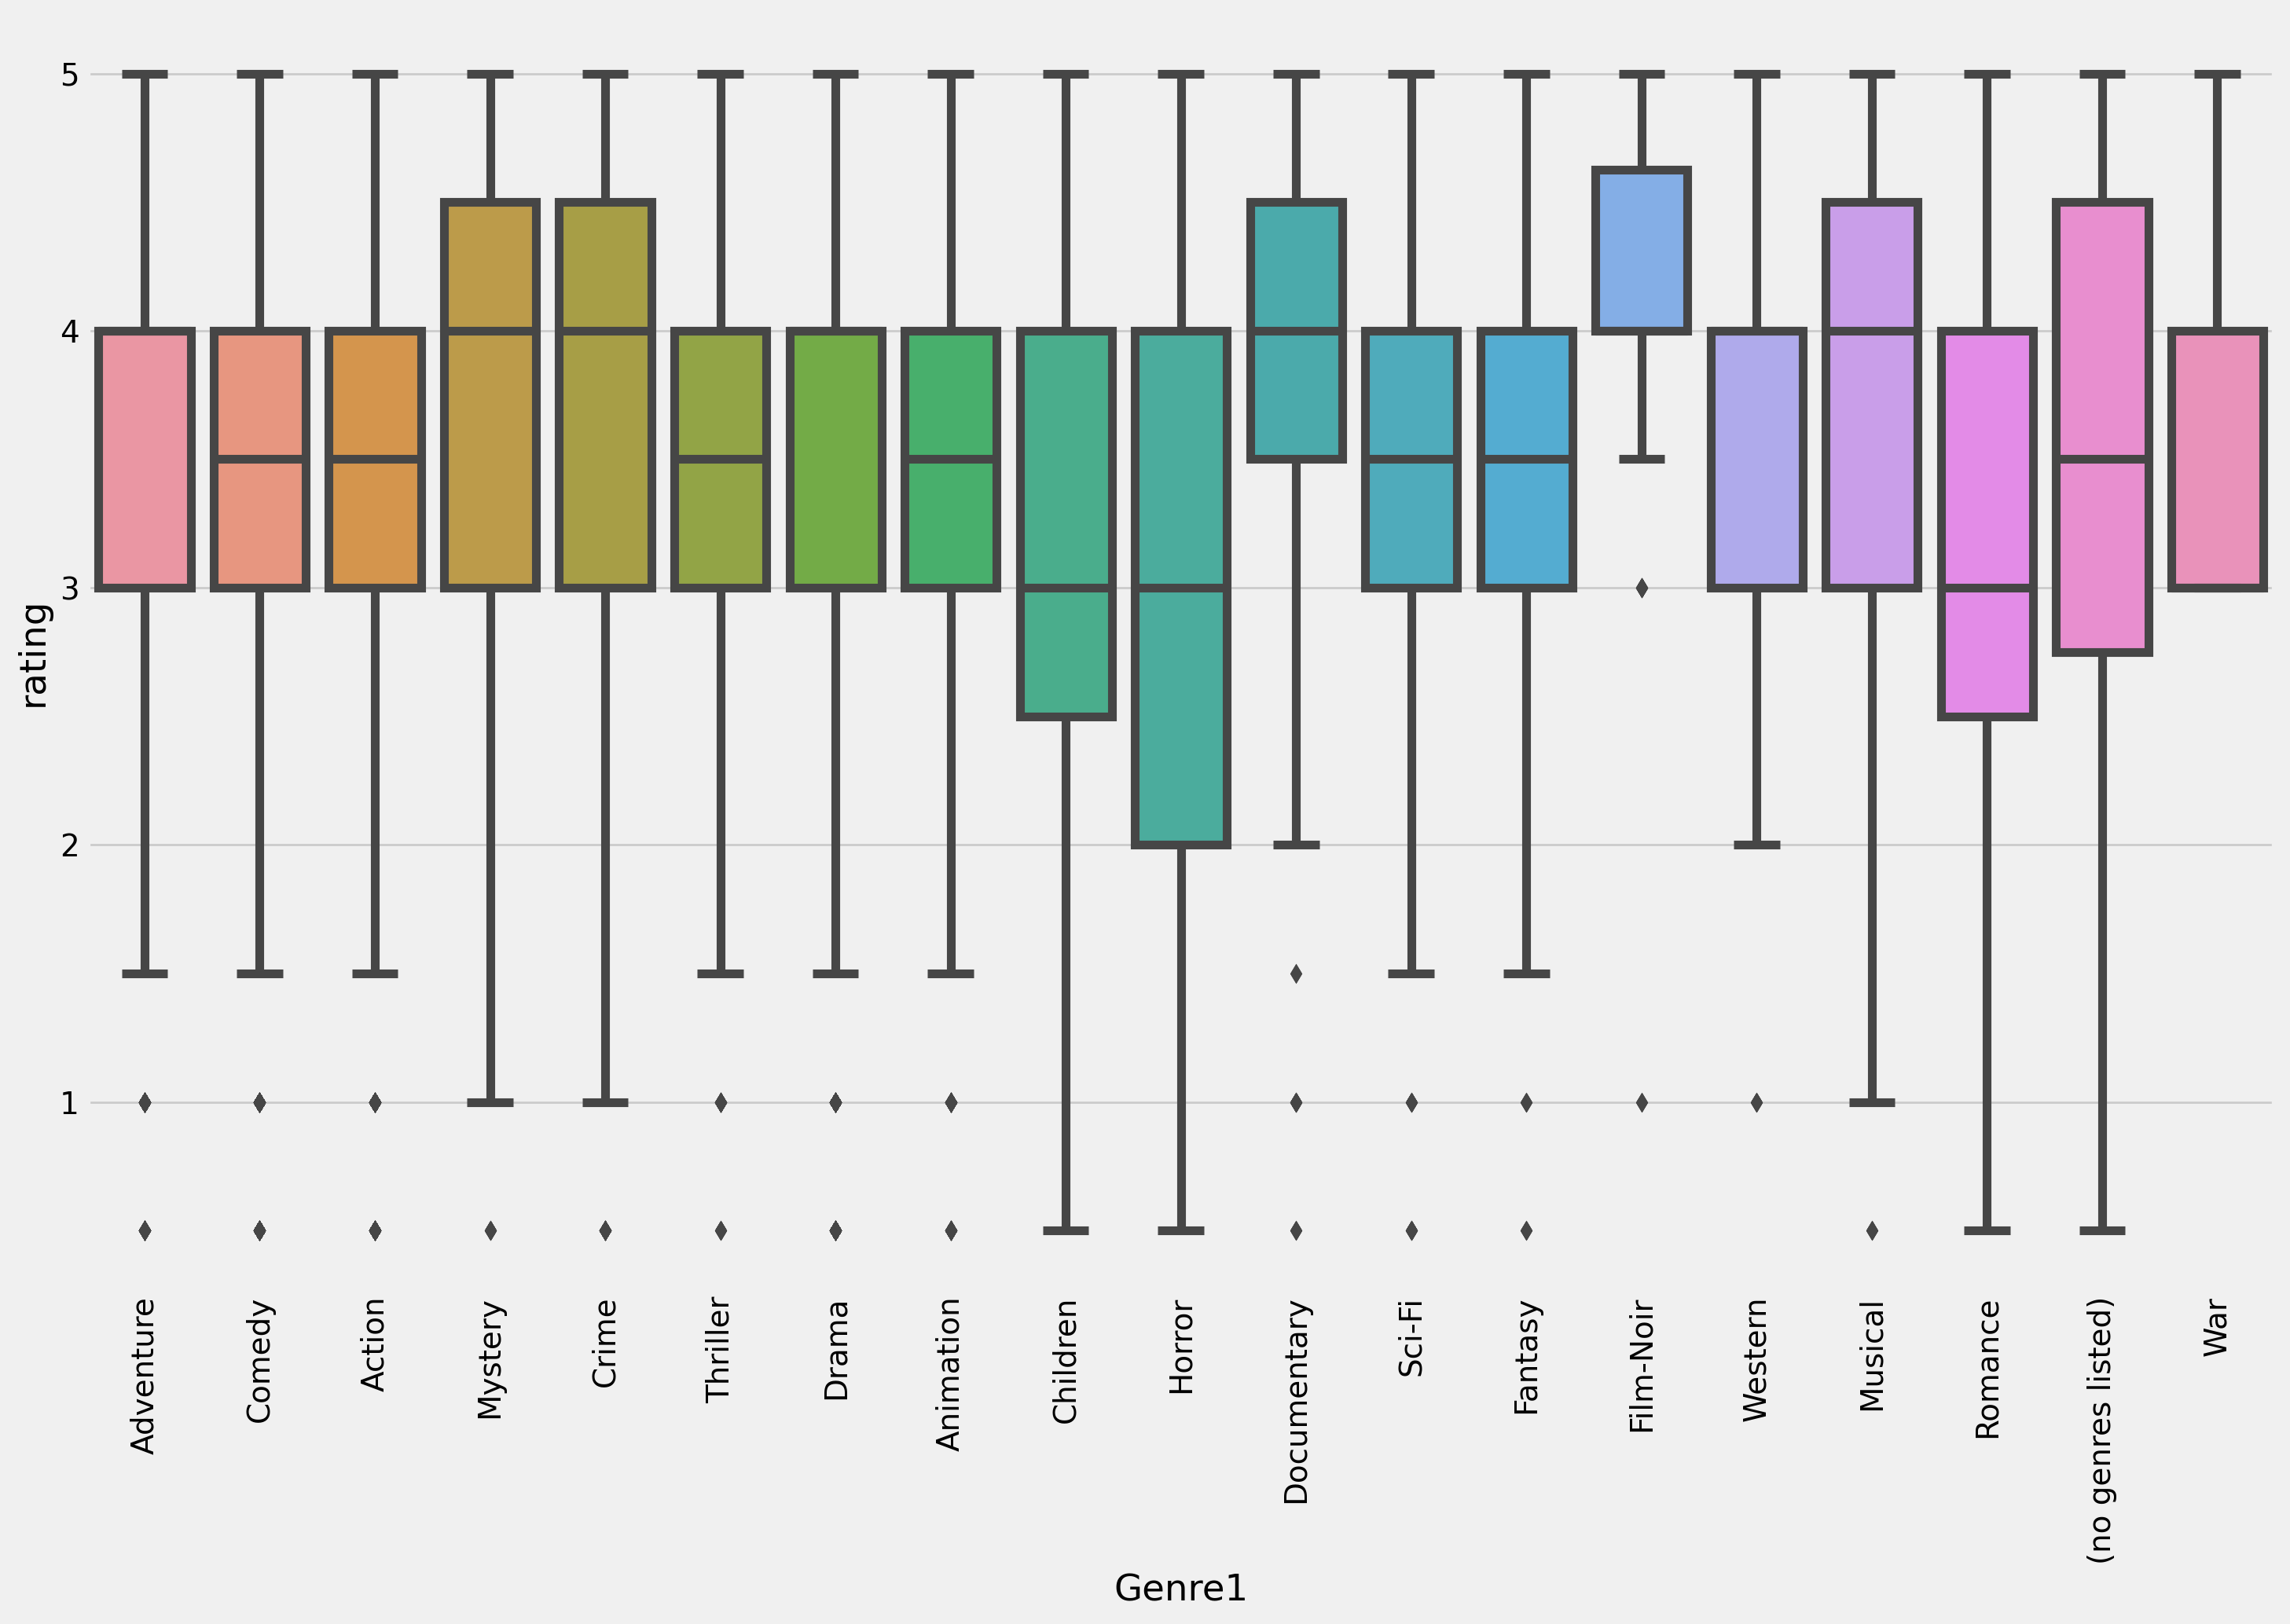

In [ ]:
fig = plt.figure(figsize = (16, 10), dpi = 200)
sns.boxplot(data = df, x = "Genre1", y = "rating")
plt.xticks(rotation = 90);

<ipython-input-432-f47da5424763>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby("year").mean()


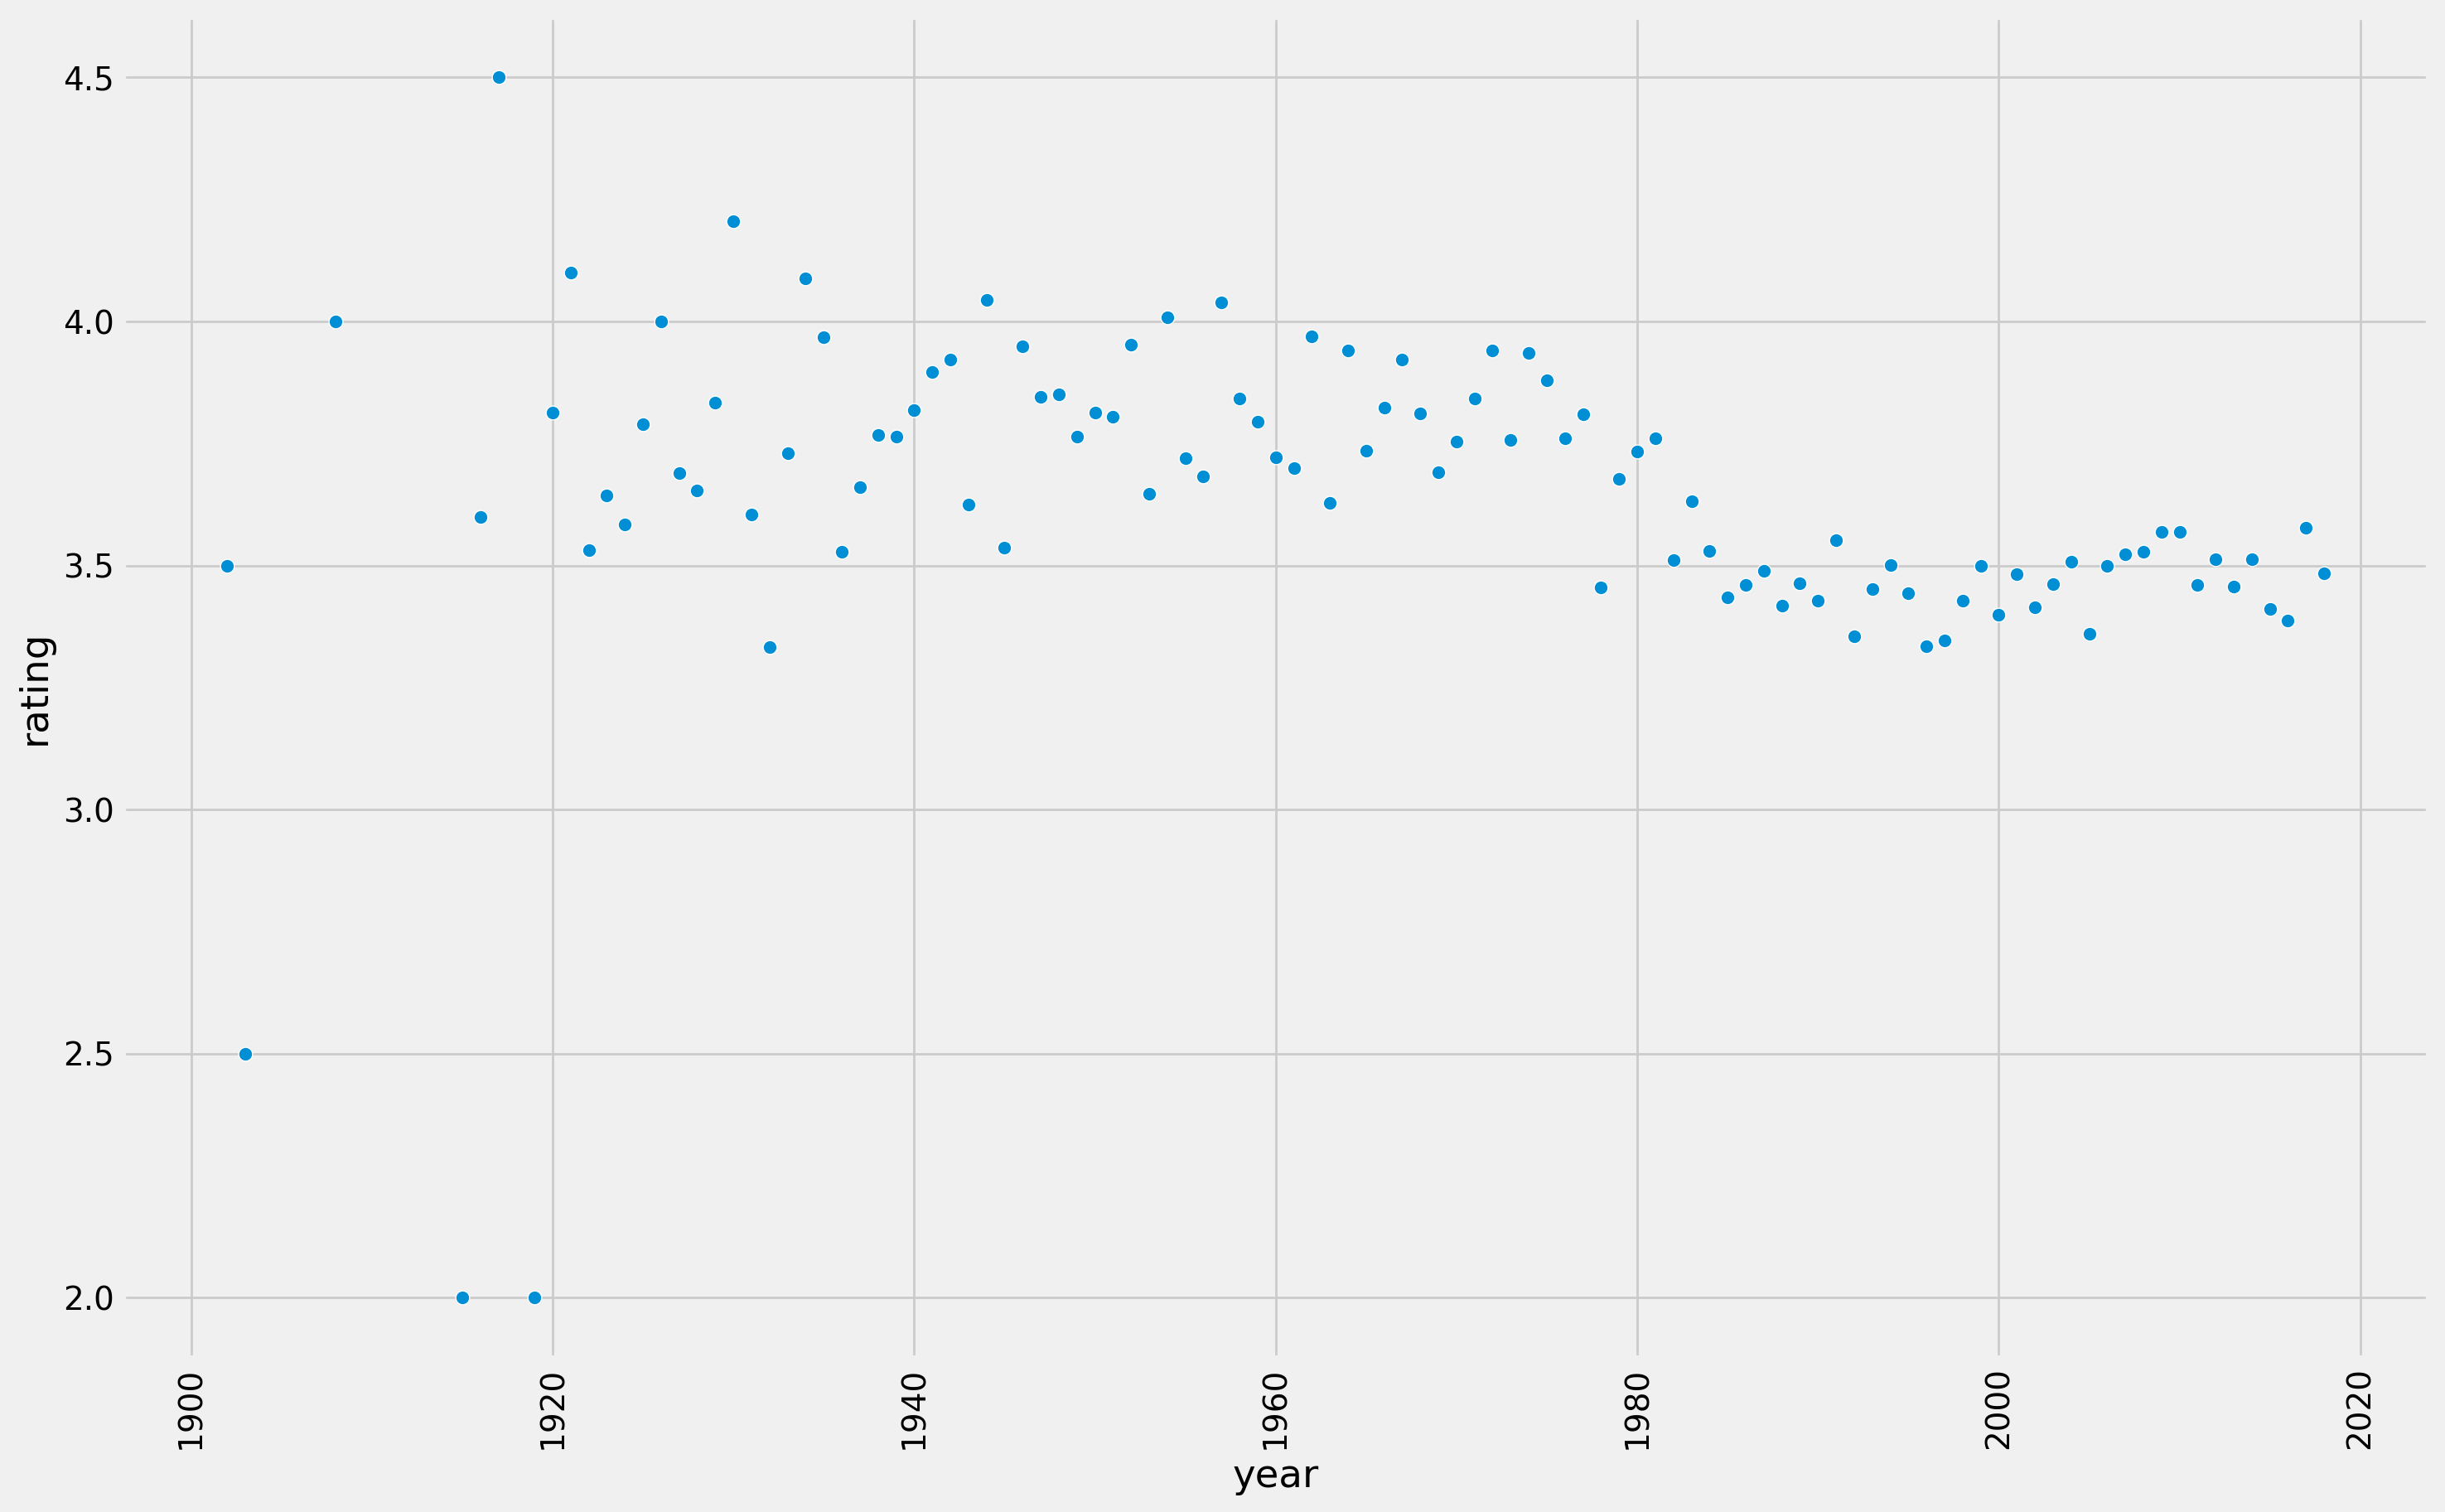

In [ ]:

#Yearly analysis
#group by year and check distribution
grouped = df.groupby("year").mean()
fig = plt.figure(figsize=(16, 10), dpi=200)
sns.scatterplot(data = grouped, x = "year", y = "rating")

plt.xticks(rotation=90)

ax.tick_params(axis='x', labelsize=9, labelcolor='black', pad=8)

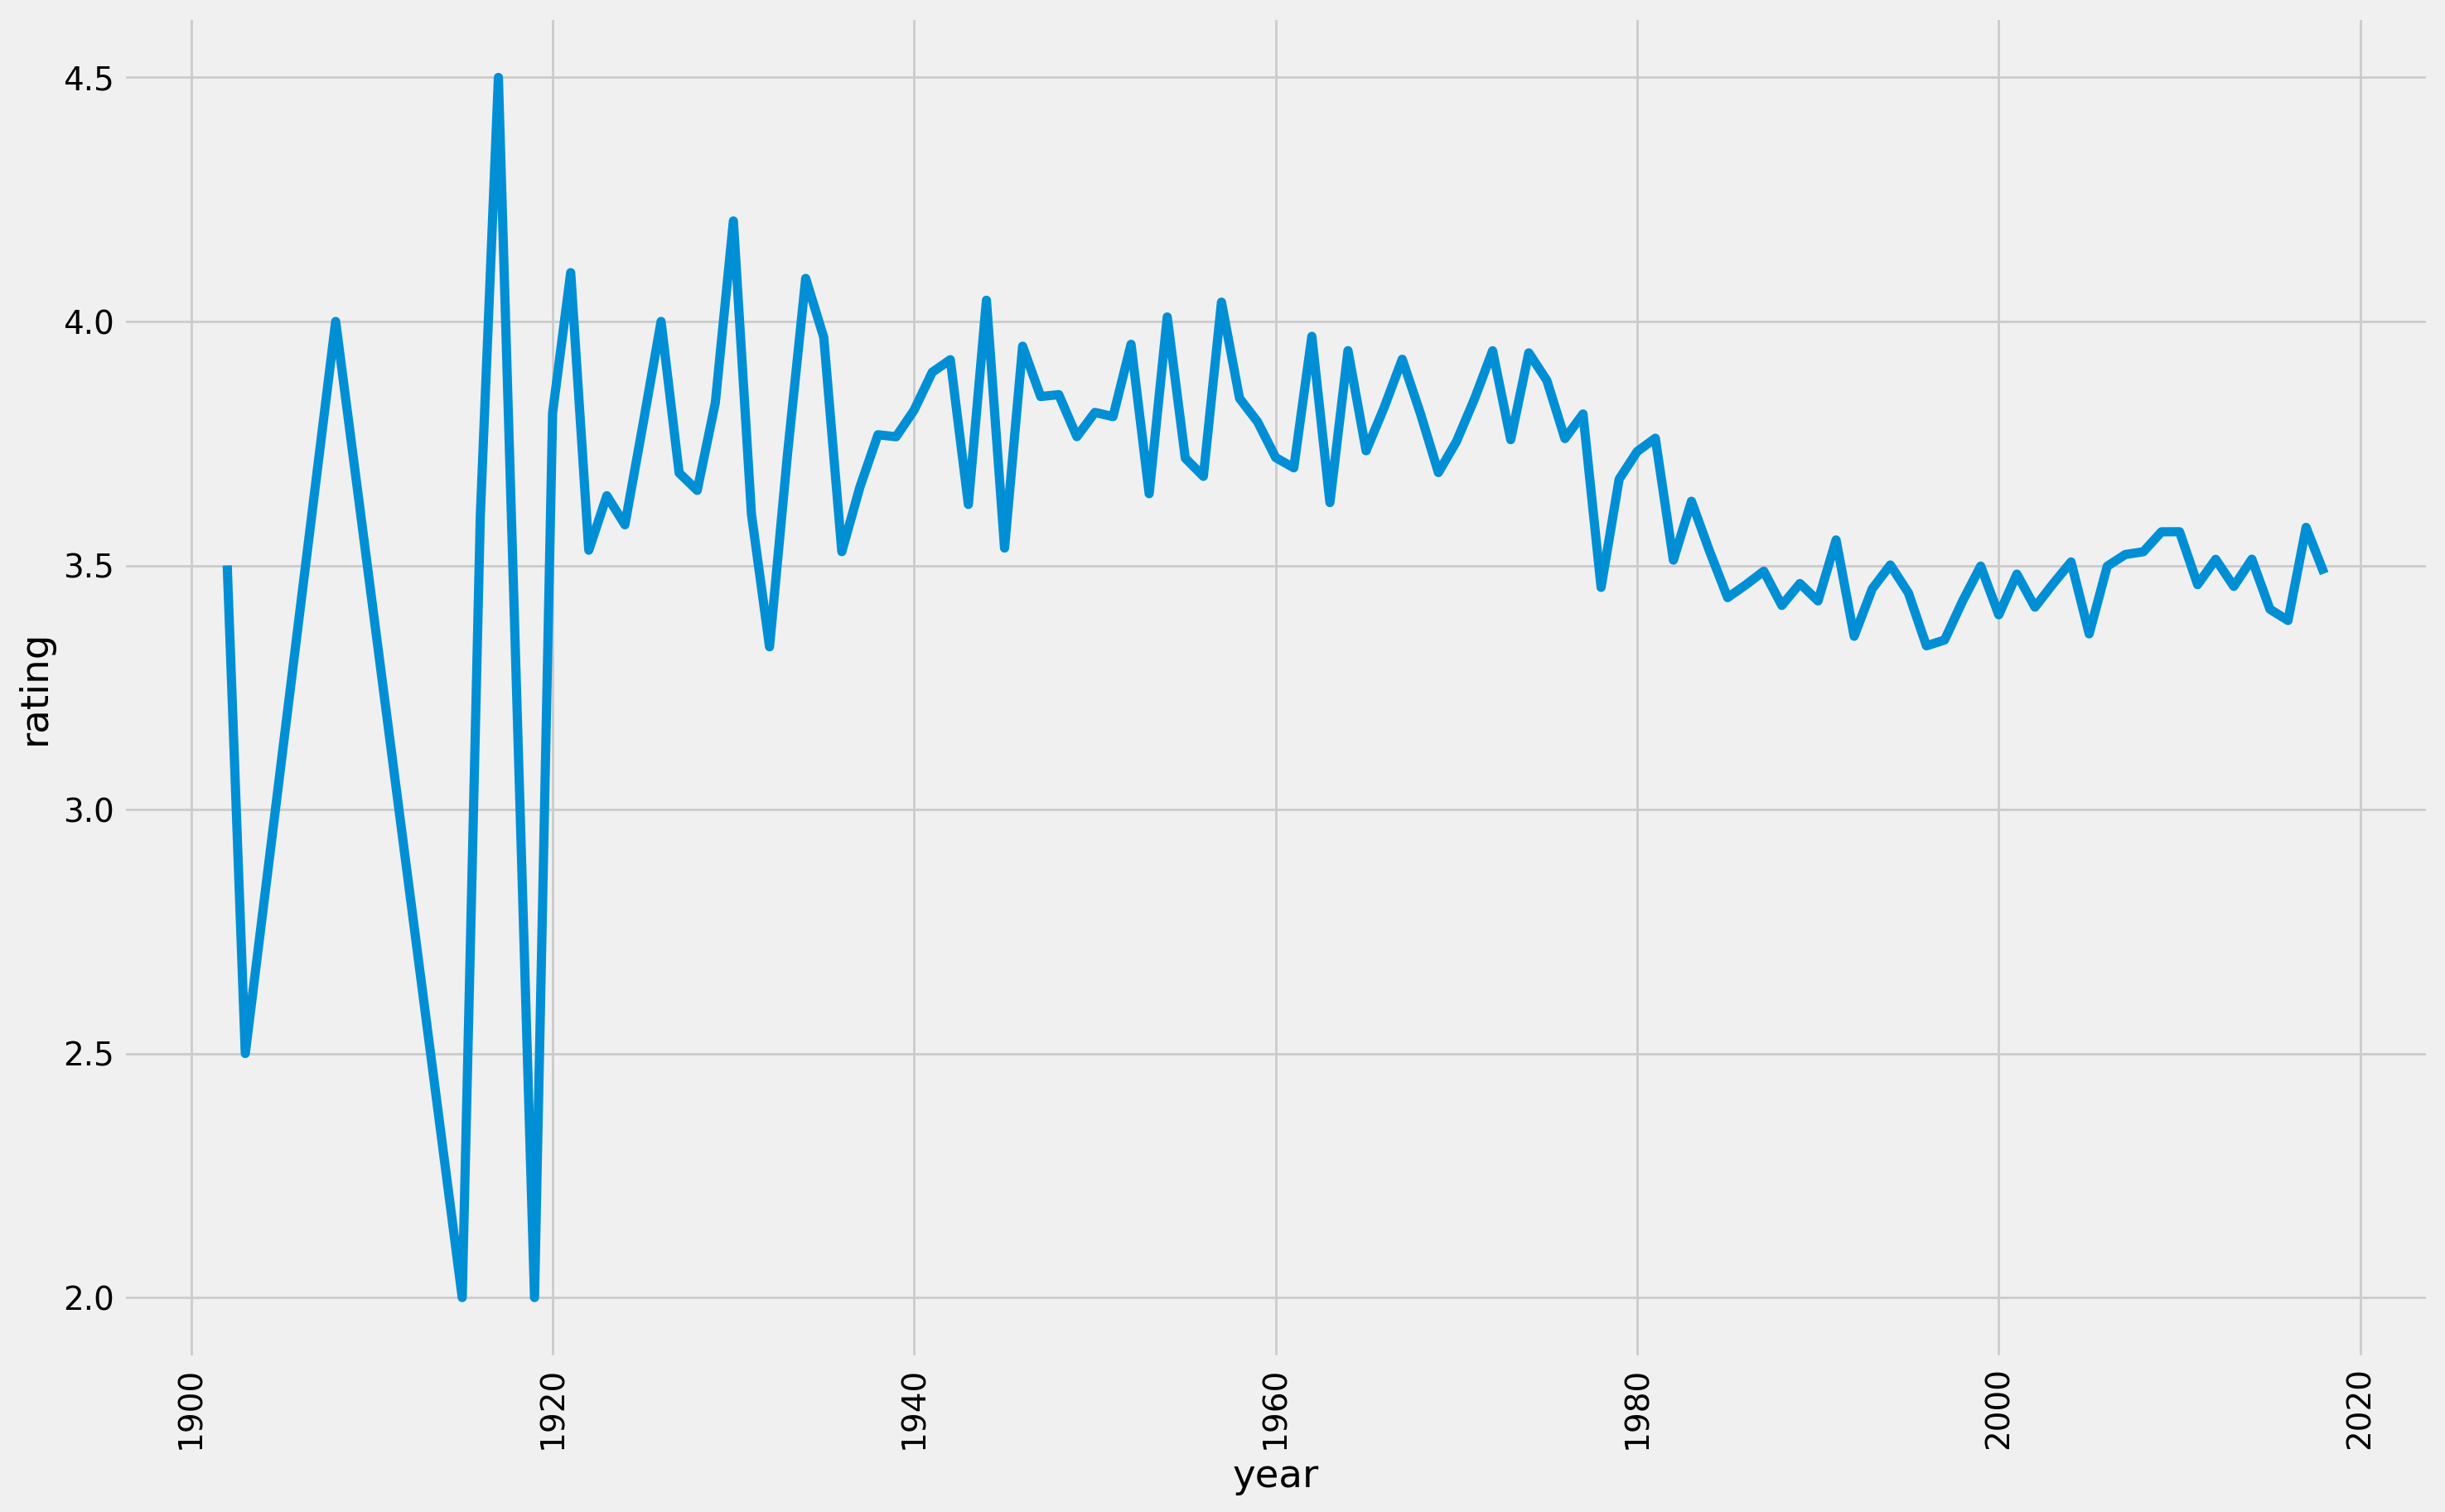

In [ ]:

#ratings over time
fig = plt.figure(figsize=(16, 10), dpi=200)
sns.lineplot(data=grouped.sort_values(["year"]), x="year", y="rating")

plt.xticks(rotation=90)

ax.tick_params(axis='x', labelsize=9, labelcolor='black', pad=8)

<Axes: xlabel='rating', ylabel='Count'>

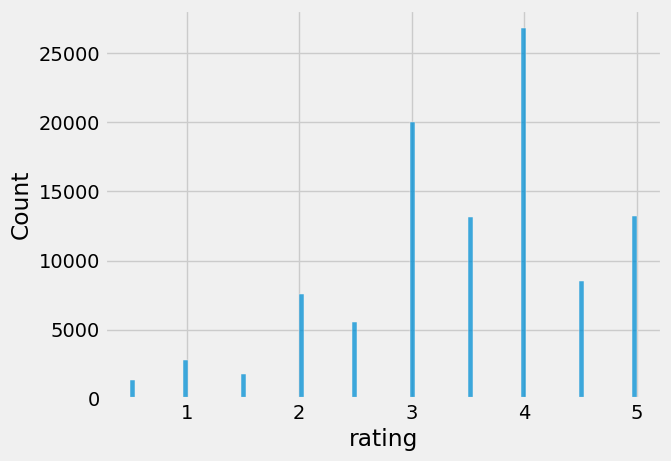

In [ ]:

#distrubtion of ratings
sns.histplot(data = df, x = "rating")

In [ ]:
#top ten highest rated movies
grouped = df.groupby("title").mean()
grouped[grouped["rating"] == 5]
grouped[grouped["rating"] == 0.5]

<ipython-input-375-53669c0aa818>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby("title").mean()


,userId,movieId,rating,timestamp,enjoyed
title,,,,,
3 Ninjas Knuckle Up,307.0,4750.0,0.5,1.186259e+09,0.0
3 dev adam (Three Giant Men),599.0,104017.0,0.5,1.519369e+09,0.0
Aloha,298.0,134528.0,0.5,1.458650e+09,0.0
Alone in the Dark,307.0,31424.0,0.5,1.186261e+09,0.0
Amer,204.0,83601.0,0.5,1.327183e+09,0.0
...,...,...,...,...,...
"Wasp Woman, The",448.0,8137.0,0.5,1.221416e+09,0.0
While the City Sleeps,580.0,8236.0,0.5,1.167791e+09,0.0
Wizards of the Lost Kingdom II,448.0,157172.0,0.5,1.492797e+09,0.0


<Axes: xlabel='rating', ylabel='Count'>

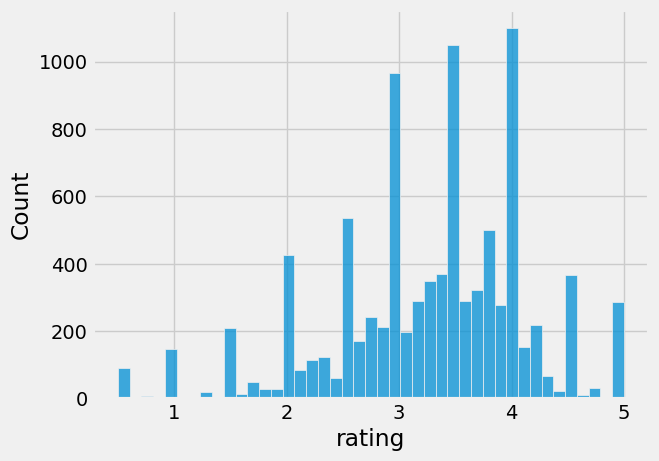

In [ ]:
sns.histplot(data = grouped, x = "rating")

Create data frame filled for average ratings to Cluster upon

In [ ]:
avg_ratings = df.groupby("userId").mean()["rating"]

<ipython-input-377-7e9535eab7cf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_ratings = df.groupby("userId").mean()["rating"]


In [ ]:
new_df = pd.pivot_table(data = df, values = "rating", columns = "title", index = "userId", aggfunc = np.mean)

In [ ]:
for i in range(1,len(new_df)+1):
   new_df[i-1: i] = new_df[i-1: i].fillna(axis = 1,value = avg_ratings[i])

In [ ]:
new_df

title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,...,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399
607,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,...,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096
608,3.134176,3.134176,3.134176,3.134176,3.134176,3.134176,3.134176,3.134176,3.134176,3.134176,...,3.134176,3.134176,3.134176,3.134176,3.134176,4.500000,3.500000,3.134176,3.134176,3.134176


Performing clustering algorithms

K Means Clustering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
model.cluster_centers_
model.inertia_
model.labels_

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(new_df)
    sse.append(kmeans.inertia_)

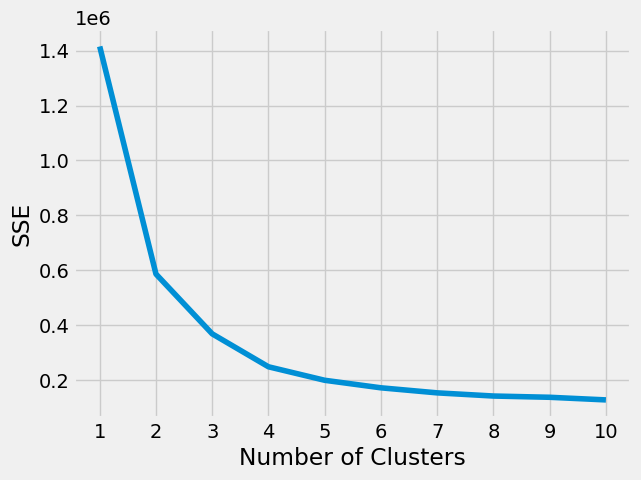

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(new_df)
    score = silhouette_score(new_df, kmeans.labels_)
    silhouette_coefficients.append(score)

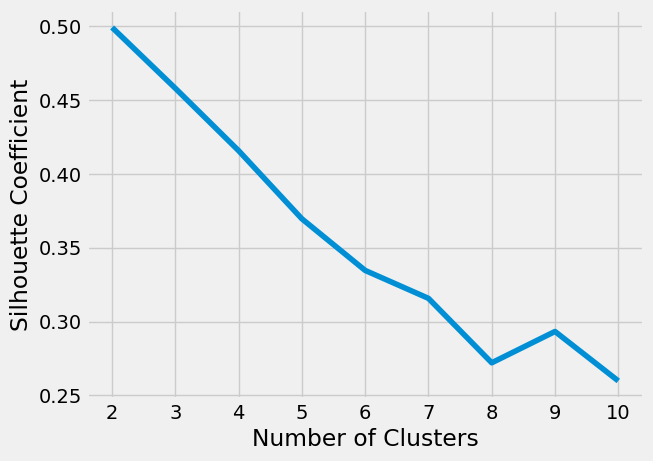

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
final_model = KMeans(n_clusters = 7, **kmeans_kwargs)

In [ ]:
final_model.fit(new_df)

KMeans(init='random', n_clusters=7, n_init=10, random_state=42)

In [ ]:
clusters = pd.DataFrame(index = new_df.index, data = final_model.labels_, columns = ["cluster"])

In [ ]:
final_df = df.merge(clusters, how = "inner", on = "userId")
final_dum = final_df.drop(['title'], axis = 1)

In [ ]:
final_dum = pd.get_dummies(final_dum, drop_first = True)
final_dum

,userId,movieId,rating,timestamp,enjoyed,year,cluster,Genre1_Action,Genre1_Adventure,Genre1_Animation,...,Genre2_Film-Noir,Genre2_Horror,Genre2_IMAX,Genre2_Musical,Genre2_Mystery,Genre2_Romance,Genre2_Sci-Fi,Genre2_Thriller,Genre2_War,Genre2_Western
0,1,1,4.0,964982703,1,1995-01-01,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,1,1995-01-01,5,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,1,1995-01-01,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,47,5.0,964983815,1,1995-01-01,5,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,50,5.0,964982931,1,1995-01-01,5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,578,68269,4.5,1300996671,1,2009-01-01,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
100832,578,6751,2.5,1300990921,0,2003-01-01,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100833,578,7395,4.0,1300996571,1,1950-01-01,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100834,578,56389,4.0,1300996756,1,2007-01-01,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<Axes: xlabel='cluster', ylabel='count'>

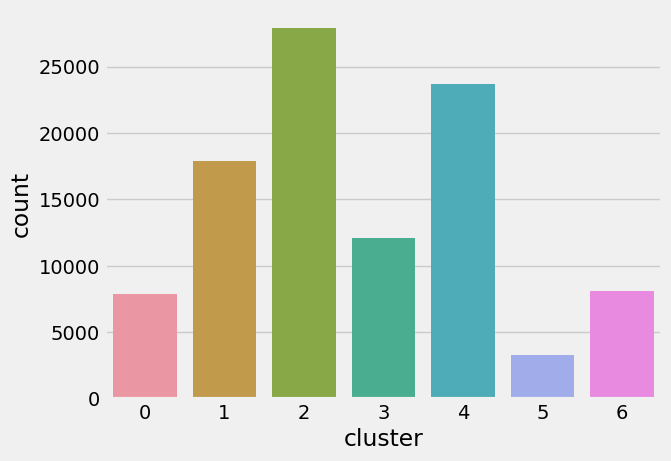

In [ ]:
sns.countplot(data = final_df, x = "cluster")

<ipython-input-458-42c3d1aa720c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_corr = final_dum.corr()["cluster"]


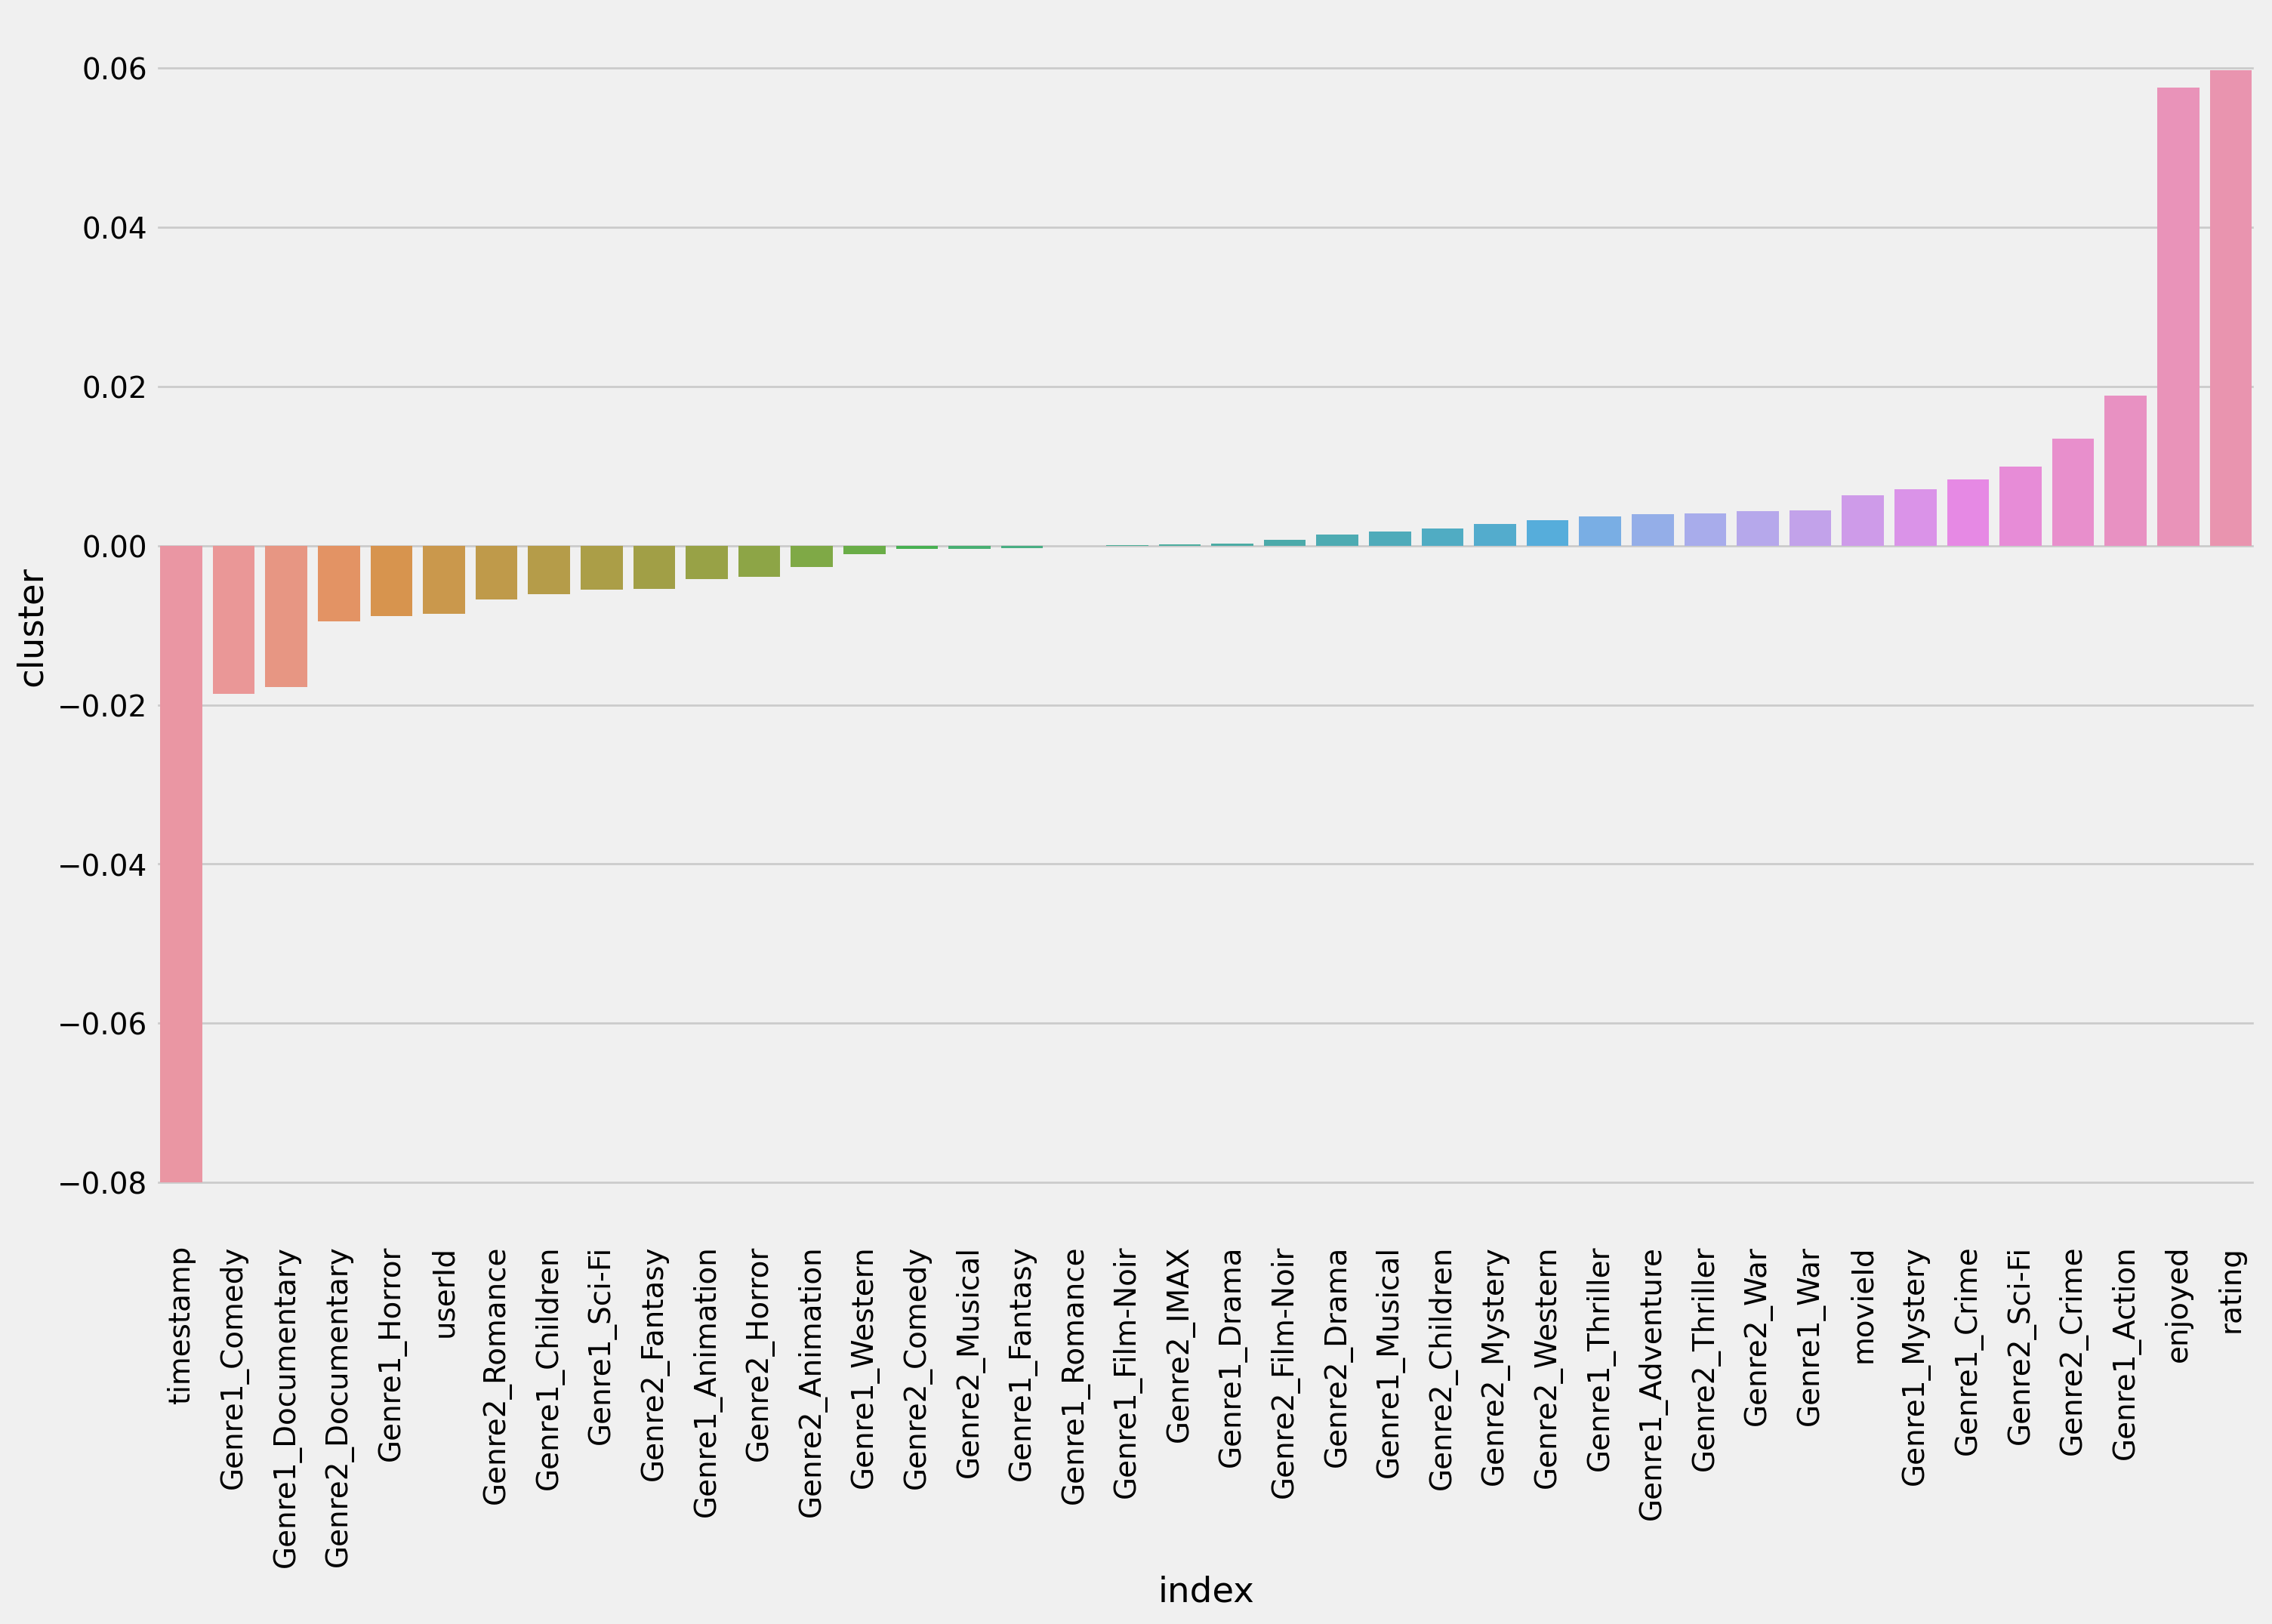

In [ ]:

fig = plt.figure(figsize=(16, 10), dpi=200)

cluster_corr = final_dum.corr()["cluster"]
cluster_corr = cluster_corr.sort_values()[:-1]

cluster_corr = cluster_corr.reset_index()

sns.barplot(data=cluster_corr, x="index", y="cluster")
plt.xticks(rotation=90);

<ipython-input-459-59eb62327a48>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_dum.corr())


<Axes: >

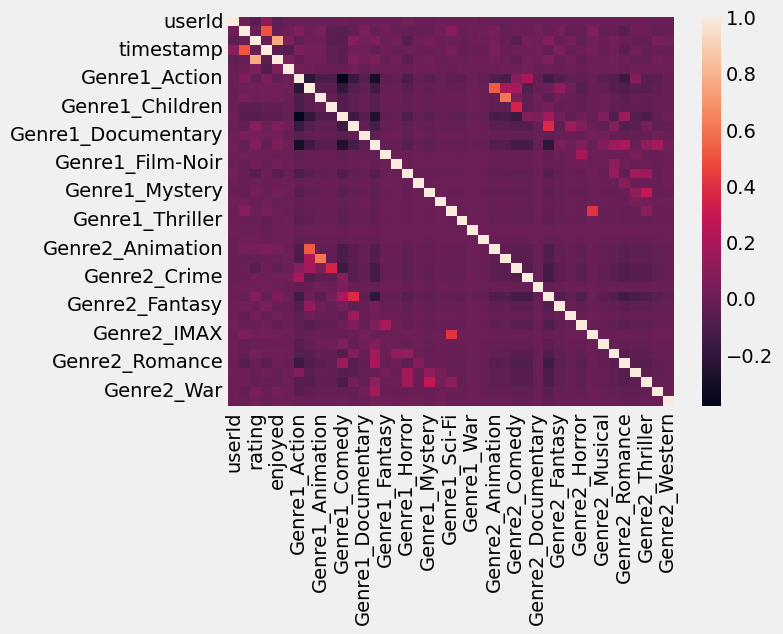

In [ ]:
sns.heatmap(final_dum.corr())

DBSCAN CLUSTERING

Running Machine learning algorithms on clusters

Now we have the final clusters we can use these to see how good of predictors they are for movie ratings. We can use different models and run these on the data and see how they perform.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):

    # Fit Model
    model.fit(X_train,y_train)

    # Get Metrics

    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')

    # Plot results

In [ ]:
X = final_df.drop(["rating","enjoyed", "title", "year"], axis = 1)
y = final_df["rating"]
X

,userId,movieId,timestamp,genres,cluster
0,1,1,964982703,Adventure|Animation|Children|Comedy|Fantasy,5
1,1,3,964981247,Comedy|Romance,5
2,1,6,964982224,Action|Crime|Thriller,5
3,1,47,964983815,Mystery|Thriller,5
4,1,50,964982931,Crime|Mystery|Thriller,5
...,...,...,...,...,...
100831,578,68269,1300996671,Drama|Romance,1
100832,578,6751,1300990921,Drama|Thriller,1
100833,578,7395,1300996571,Comedy|Drama,1
100834,578,56389,1300996756,Drama|Romance,1


In [ ]:
X = pd.get_dummies(data = X, drop_first = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.8850817490360011


In [ ]:
#Create a function to tidy up the data


#create function to run kmeans algorithm
# using k = 7



#create a new data point put in my own ratings, average the rest

#model.predict to predict the cluster of a new data point

#create model SVM or other and create a function
#to run this model, model should just run
#on clusters and rating predict rating from
#clusters